In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from models import PipeLine
from accuracies import *
from utils import *
from losses import *
from optimizers import *
from layers import *
from activations import *

In [2]:
np.random.seed(42)

In [ ]:
path = r'\Brain-tumor-diagnosis-with-numpy\datasets\Brain'

In [4]:
DTYPE = np.float32

In [5]:
table = {
    'No Tumor': 0,
    'Tumor': 1
}

In [6]:
data, labels = load_data(path, table, 84, split=1)

In [7]:
data, labels = np.array(data).astype(DTYPE) / 255.0, np.array(labels).astype(DTYPE)

In [8]:
data, labels = np.expand_dims(data, axis=-1), np.expand_dims(labels, axis=-1)

In [9]:
data, labels = shuffle_data(data, labels)

In [10]:
x_train, y_train, x_test, y_test = split_data(data, labels, split=0.2)

In [11]:
model = PipeLine((
    Conv2d(1, 4, activation=LeakyReLU()),
    MaxPool2d(2, 2),
    Conv2d(4, 8, activation=LeakyReLU()),
    MaxPool2d(2, 2),
    Conv2d(8, 16, activation=LeakyReLU()),
    MaxPool2d(2, 2),
    Conv2d(16, 2, activation=LeakyReLU()),
    Flatten(),
    Dense(15138, 64, activation=LeakyReLU()),
    Dense(64, 32, activation=LeakyReLU()),
    Dense(32, 1, activation=Sigmoid())
))

In [12]:
model.compile(
    loss=BinaryCrossEntropy(),
    optimizer=Adam(),
    accuracy=FactorAccuracy()
)

In [13]:
history_loss, history_acc = model.train(x_train, y_train, epochs=8, batch_size=32, shuffle=True, verbose=True, print_every=0.1, x_test=x_test, y_test=y_test)

Epoch: [1/8] time: 22.15 seconds > Loss: 0.6906, Acc: 0.6980, Test Loss: 0.5273, Test Acc: 0.7600
Epoch: [2/8] time: 19.85 seconds > Loss: 0.3921, Acc: 0.8416, Test Loss: 0.5634, Test Acc: 0.8200
Epoch: [3/8] time: 20.01 seconds > Loss: 0.2727, Acc: 0.9010, Test Loss: 0.7420, Test Acc: 0.8200
Epoch: [4/8] time: 19.76 seconds > Loss: 0.1509, Acc: 0.9257, Test Loss: 0.9356, Test Acc: 0.8400
Epoch: [5/8] time: 20.06 seconds > Loss: 0.0646, Acc: 0.9802, Test Loss: 1.2955, Test Acc: 0.7800
Epoch: [6/8] time: 21.38 seconds > Loss: 0.0302, Acc: 0.9851, Test Loss: 1.4607, Test Acc: 0.6800
Epoch: [7/8] time: 20.78 seconds > Loss: 0.0093, Acc: 0.9950, Test Loss: 1.4552, Test Acc: 0.8400
Epoch: [8/8] time: 20.68 seconds > Loss: 0.0204, Acc: 0.9901, Test Loss: 1.6271, Test Acc: 0.8600


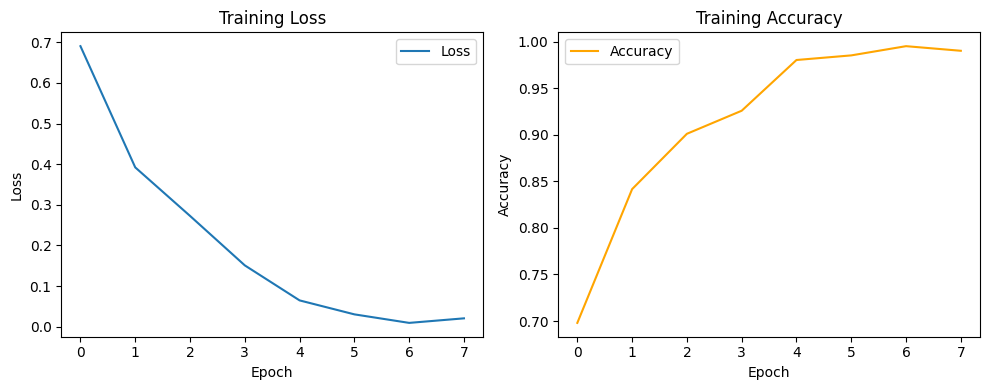

In [14]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_acc, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
def visualize_feature_maps(image, layer_output, layer_name="", n_cols=4, base_size=3):
    if len(image.shape) == 4:
        image = image[0]

    feature_maps = layer_output[0]
    n_channels = feature_maps.shape[-1]
    n_rows = np.ceil(n_channels / n_cols).astype(int)

    fig_height = base_size * (n_rows + 1)
    fig_width = base_size * n_cols
    fig = plt.figure(figsize=(fig_width, fig_height))
    
    gs = gridspec.GridSpec(n_rows + 1, n_cols, figure=fig)

    ax_img = fig.add_subplot(gs[0, :])
    ax_img.imshow(image.squeeze(), cmap='gray')
    ax_img.set_title('Input Image')
    ax_img.axis('off')

    fig.suptitle(f'Feature Maps: {layer_name}', fontsize=14)

    for i in range(n_channels):
        row = (i // n_cols) + 1
        col = i % n_cols

        ax = fig.add_subplot(gs[row, col])
        channel = feature_maps[:, :, i]
        if channel.max() > channel.min():
            channel = (channel - channel.min()) / (channel.max() - channel.min())

        ax.imshow(channel, cmap='viridis', vmin=0, vmax=1)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [22]:
random_idx = np.random.randint(0, x_test.shape[0])
random_image, random_label = x_test[random_idx:random_idx+1], y_test[random_idx]
prediction = model.forward(random_image)
print(f'Prediction: {prediction[0][0]:.2%} | Real: {random_label[0]:.2%}')

Prediction: 99.85% | Real: 100.00%


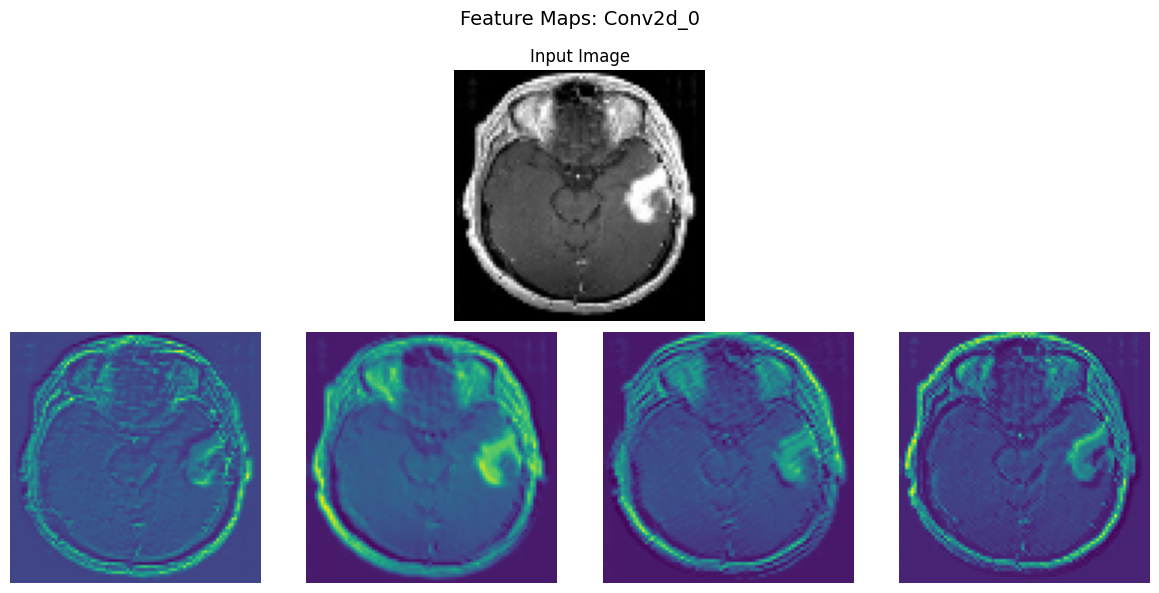

In [23]:
visualize_feature_maps(random_image, model.layers[0].outputs, model.layers[0].name, n_cols=4)

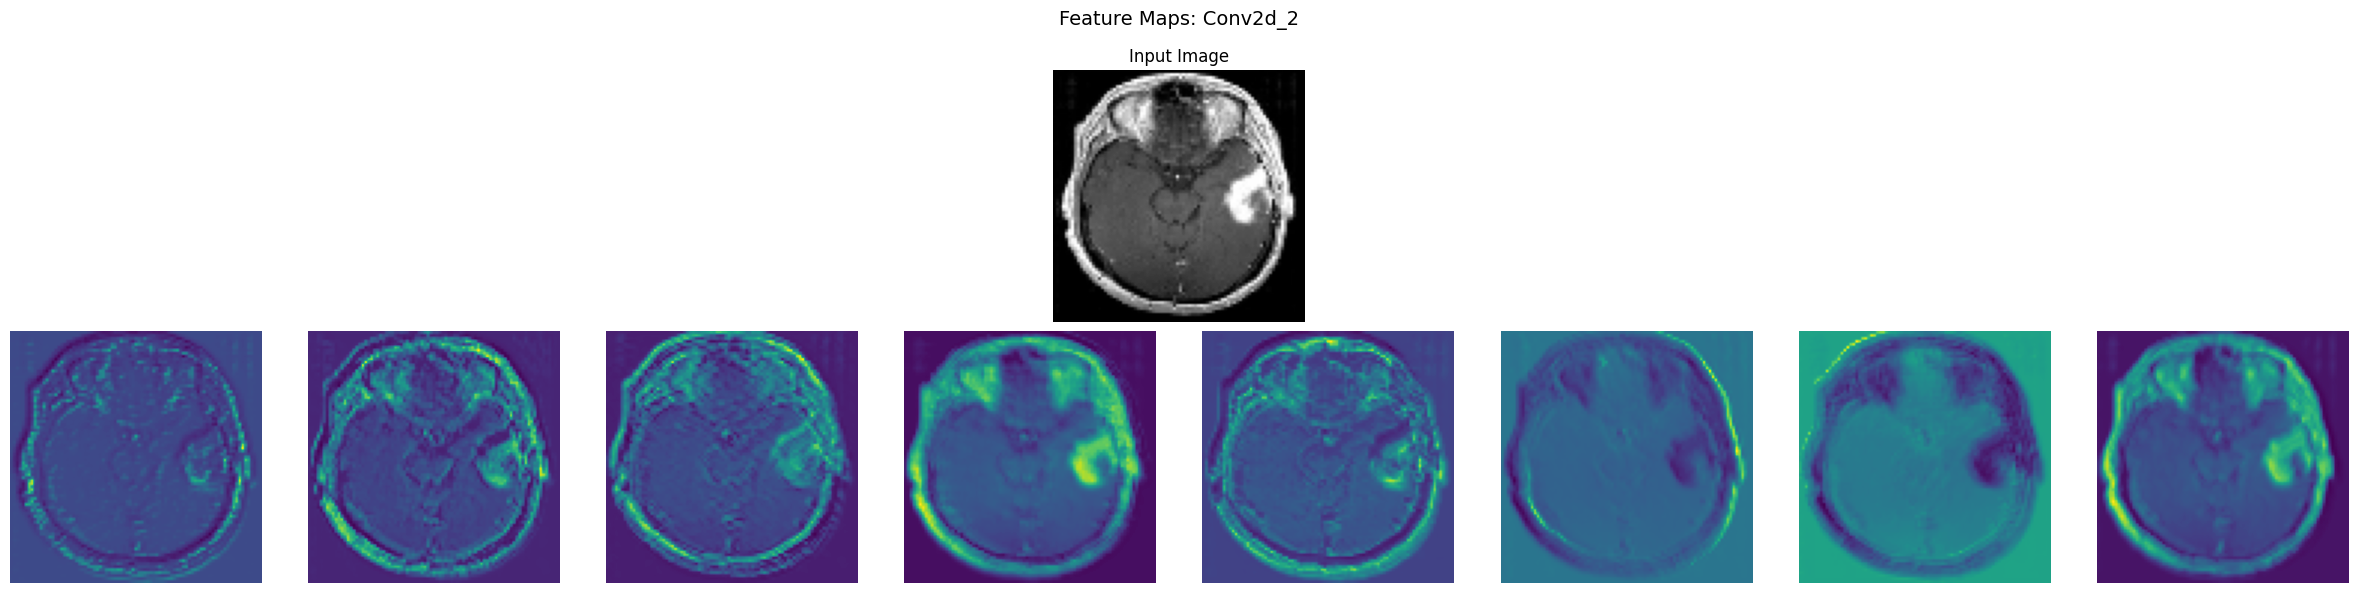

In [24]:
visualize_feature_maps(random_image, model.layers[2].outputs, model.layers[2].name, n_cols=8)

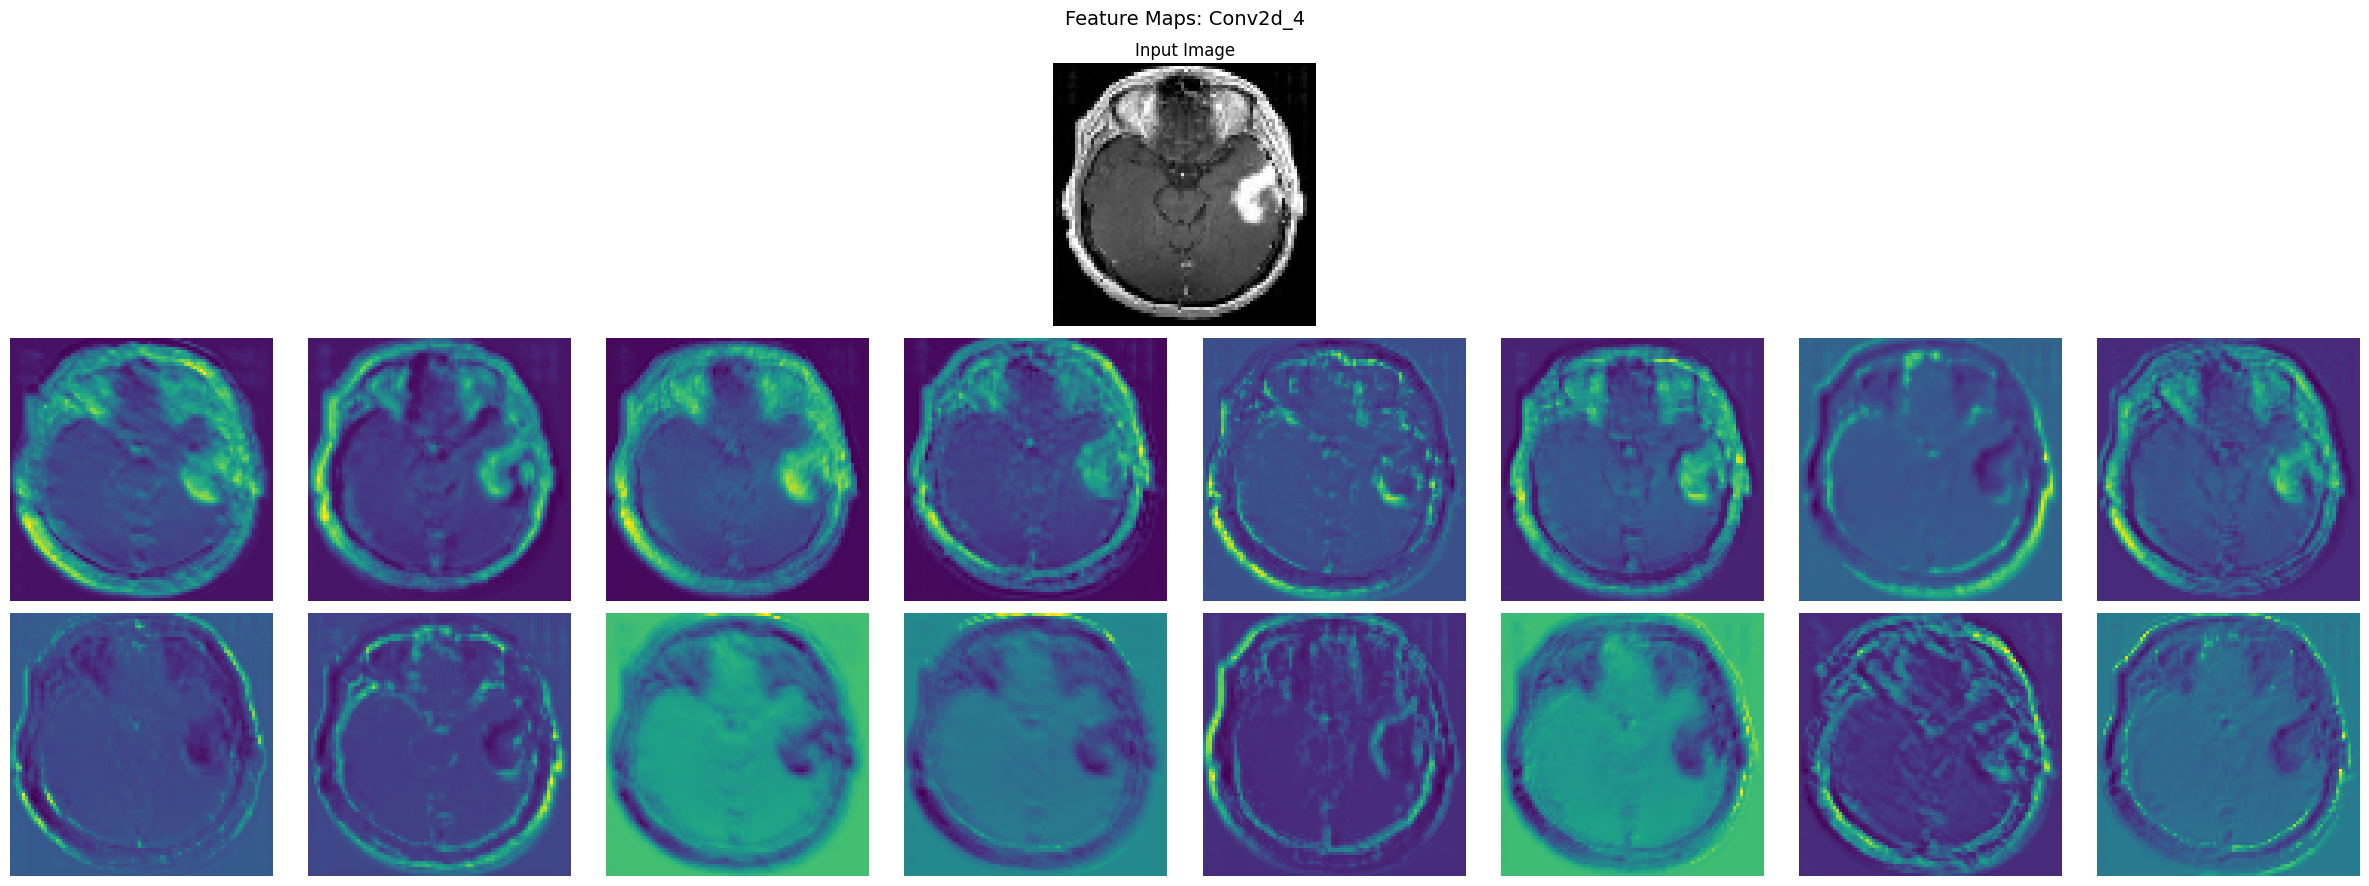

In [25]:
visualize_feature_maps(random_image, model.layers[4].outputs, model.layers[4].name, n_cols=8)

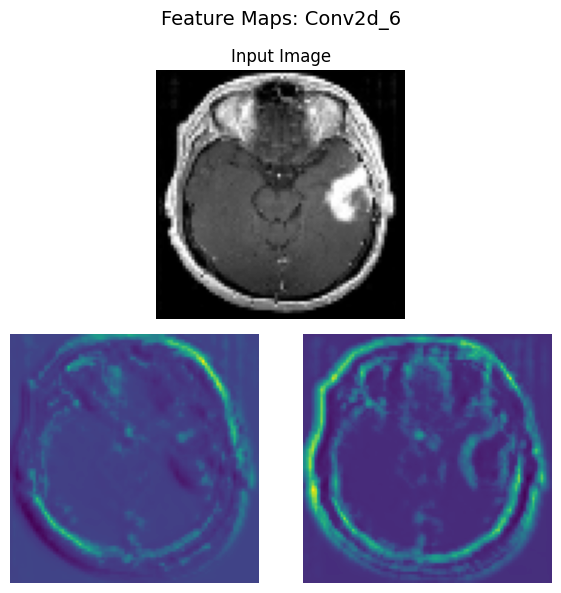

In [26]:
visualize_feature_maps(random_image, model.layers[6].outputs, model.layers[6].name, n_cols=2)